Correlation
====
We say that two variables are _correlated_ when a change in one is associated with a change in the other.

Generate some synthetic data with random noise.

In [1]:
set.seed(6554)
x <- sample(1:20,20) + rnorm(20,sd=2)
y <- x + rnorm(20, sd=3)  # y is correlated with x
z <- sample(1:20,20)/2 + rnorm(20, sd=5)
df <- data.frame(x,y,z)

Let's plot the data to see the relations

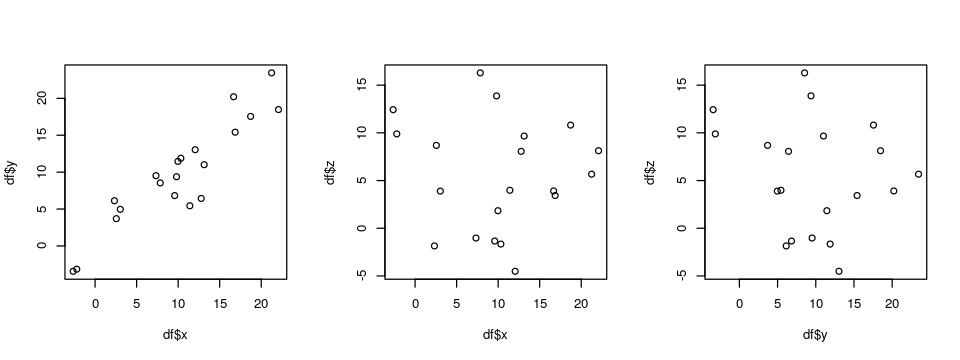

In [2]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,3))
plot(df$x, df$y)
plot(df$x, df$z)
plot(df$y, df$z)

It appears that x and y are correlated positively, while z in not correlated with the rest. Let's check this intuition by calculating the _Pearson correlation coefficient_. This coefficient has values between -1 and 1, 1 indicating perfect positive correlation, 0 indicating no correlation.

In [3]:
cor(df, method="pearson")

,x,y,z
x,1.00000000,0.9194607,-0.06595349
y,0.91946075,1.0000000,-0.18083546
z,-0.06595349,-0.1808355,1.00000000


The correlation coefficient between x and y is close to 1, and that between z and the others is small.

However, this is not the end of the story. These results might be due to luck, resulting from the finite number of data we got. The _correlation test_ gives us a confidence interval about this result.

In [4]:
cor.test(df$x, df$y, method="pearson")


	Pearson's product-moment correlation

data:  df$x and df$y
t = 9.9215, df = 18, p-value = 1.008e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8041212 0.9680862
sample estimates:
      cor 
0.9194607 


In [5]:
cor.test(df$x, df$z, method="pearson")


	Pearson's product-moment correlation

data:  df$x and df$z
t = -0.28043, df = 18, p-value = 0.7823
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4940549  0.3878881
sample estimates:
        cor 
-0.06595349 


Let's apply this to a real data set, the height and weight data for men and women which we have used before.

In [6]:
url <- "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
heights_weights_gender <- read.table(url, header=T, sep=",")

In [7]:
men <- heights_weights_gender$Gender == "Male"
men_heights <- heights_weights_gender[["Height"]][men]
men_weights <- heights_weights_gender[["Weight"]][men]
women <- heights_weights_gender$Gender == "Female"
women_heights <- heights_weights_gender[["Height"]][women]
women_weights <- heights_weights_gender[["Weight"]][women]

In [8]:
cor.test(men_heights,men_weights)


	Pearson's product-moment correlation

data:  men_heights and men_weights
t = 120.75, df = 4998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8557296 0.8698894
sample estimates:
      cor 
0.8629788 


In [9]:
cor.test(women_heights,women_weights)


	Pearson's product-moment correlation

data:  women_heights and women_weights
t = 113.88, df = 4998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8417121 0.8571417
sample estimates:
      cor 
0.8496086 


Correlation does not mean causation
----
If A and B are correlated, this might mean
* A causes B.
* B causes A.
* Both A and B are caused by another factor.
  
  <img src="img/1-causation-vs-correlation-germ-theory.png" width="30%"/>
  
  ([Source](https://amplitude.com/blog/2017/01/19/causation-correlation/))
* Pure luck, no causation.

    <img src="img/spurcorr.png", width="70%"/>
    
    ([Source](http://www.tylervigen.com/spurious-correlations))

Always plot and examine the data
----

A famous example is the _Anscombe_ data set, which illustrates that very different data can lead to the same correlation coefficient.

In [10]:
anscombe

x1,x2,x3,x4,y1,y2,y3,y4
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,8,7.24,6.13,6.08,5.25
4,4,4,19,4.26,3.10,5.39,12.50
12,12,12,8,10.84,9.13,8.15,5.56
7,7,7,8,4.82,7.26,6.42,7.91


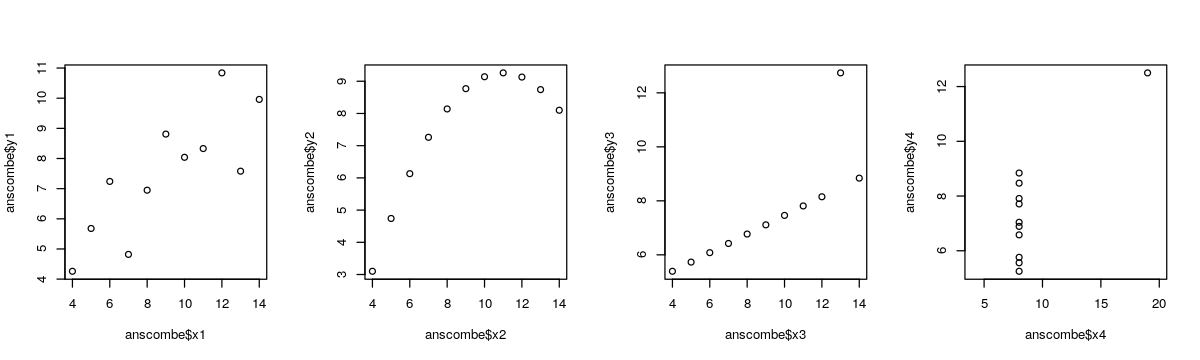

In [11]:
options(repr.plot.width=10, repr.plot.height=3)
par(mfrow = c(1,4))
plot(anscombe$x1, anscombe$y1)
plot(anscombe$x2, anscombe$y2)
plot(anscombe$x3, anscombe$y3)
plot(anscombe$x4, anscombe$y4,xlim=c(4,20))

Despite fundamental differences, the correlation coefficient for each pair of variables is the same.

In [12]:
cor(anscombe$x1, anscombe$y1)
cor(anscombe$x2, anscombe$y2)
cor(anscombe$x3, anscombe$y3)
cor(anscombe$x4, anscombe$y4)

[1] 0.8164205

[1] 0.8162365

[1] 0.8162867

[1] 0.8165214

Linear regression
====

When we discover a correlation between two variables $x$ and $y$, we may want to find out a _formula_ for the relation between them. That way, we can predict the outcome of unobserved input values.

_Assume_ a linear relationship $y=ax+b$. Then, given the observations $(x_1,y_1),\ldots,(x_n,y_n)$, the statistical procedure to determine the coefficients $a$ and $b$ is called _linear regression_.

Once we have some estimates $\hat{a}$ and $\hat{b}$ for the parameters, when we get a new input value $x$, we can predict the outcome as $y=\hat{a}x + \hat{b}$.

Let's create a synthetic data set again and fit a linear model to it.

In [13]:
set.seed(1234)
x <- sample(1:20,20) + rnorm(10,sd=2)
y <- x + rnorm(10, sd=3)  # y is correlated with x
z <- sample(1:20,20)/2 + rnorm(20, sd=5)
df <- data.frame(x,y)

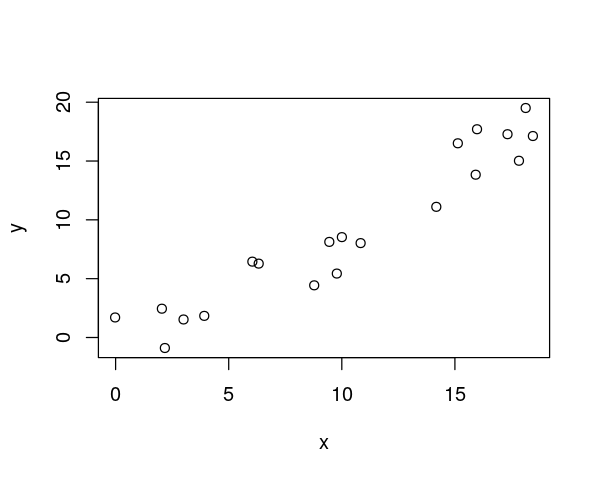

In [14]:
options(repr.plot.width=5, repr.plot.height=4)
plot(x,y)

Our purpose is to draw a line such that the distances between given points and the line are minimized. R provides a function `lm()` (for "linear model") that performs this task.

In [15]:
linmodel <- lm(y~x, data=df)

In [16]:
linmodel


Call:
lm(formula = y ~ x, data = df)

Coefficients:
(Intercept)            x  
     -1.248        1.008  


So the model is found to be $y = 1.008x - 1.248$. The resulting line can be plotted with the `abline()` function.

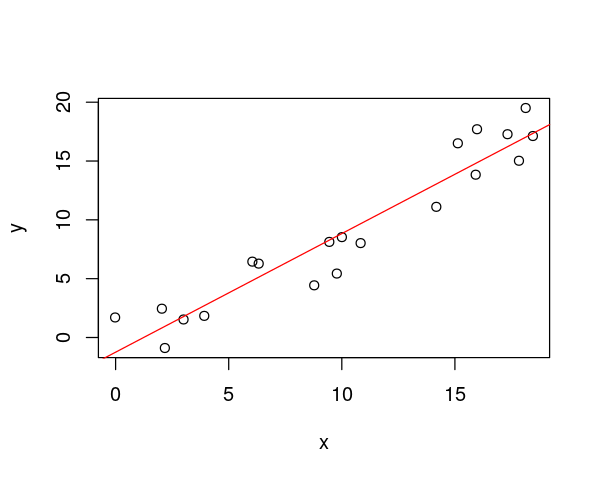

In [17]:
plot(x,y)
abline(linmodel, col="red")

Let's make a prediction for $x=25,26,\ldots,30$.

In [18]:
newx <- 25:30
predict.lm(linmodel, data.frame(x=newx))

1        2        3        4        5        6 
23.95716 24.96537 25.97358 26.98179 27.99000 28.99821

Linear regression of height and weight data
----

In [19]:
df <- data.frame(men_heights,men_weights,women_heights,women_weights)
men_hw_model <- lm("men_weights ~ men_heights", data=df)
women_hw_model <- lm("women_weights ~ women_heights", data=df)

In [20]:
men_hw_model


Call:
lm(formula = "men_weights ~ men_heights", data = df)

Coefficients:
(Intercept)  men_heights  
   -224.499        5.962  


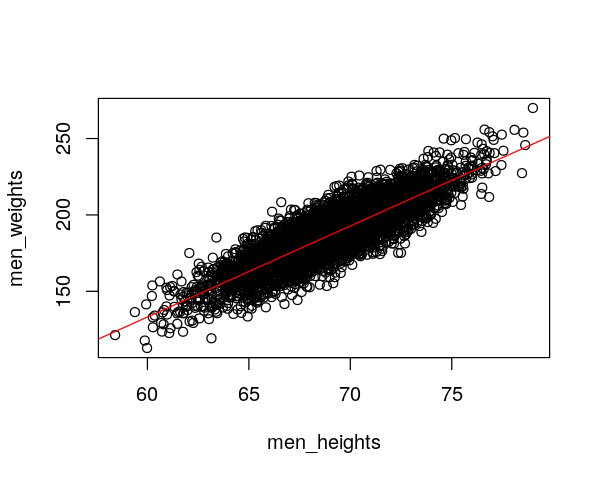

In [21]:
plot(men_heights,men_weights)
abline(men_hw_model,col="red")


Call:
lm(formula = "women_weights ~ women_heights", data = df)

Coefficients:
  (Intercept)  women_heights  
     -246.013          5.994  


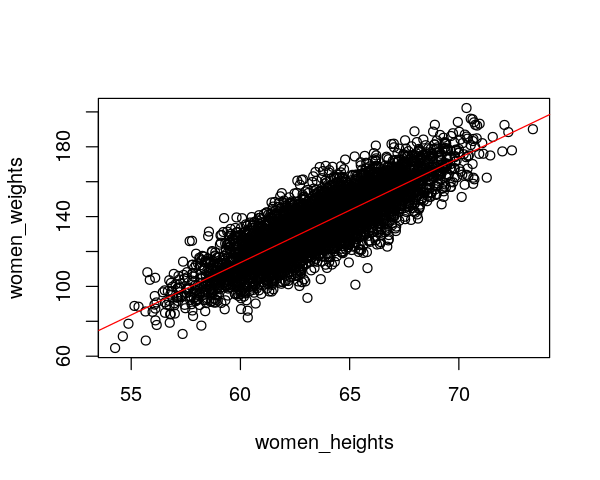

In [22]:
women_hw_model
plot(women_heights,women_weights)
abline(women_hw_model,col="red")

Linear regression with multiple variables
----

Our linear model can involve two independent variables: $y = ax + bz + c$. We can set up this model easily in R.

In [23]:
linmodel2 <- lm(y~x+z, data=df)
linmodel2


Call:
lm(formula = y ~ x + z, data = df)

Coefficients:
(Intercept)            x            z  
   -1.28237      0.98341      0.09536  


So the linear model is estimated as $y = 0.98341x + 0.09536z - 1.28237$.

Linear regression with polynomials
----

Suppose we have good reason to assume that the relation between $x$ and $y$ is quadratic, e.g. $y = ax^2 + bx +c$. Set up some synthetic data accordingly.

In [24]:
set.seed(8764)
x <- 0:19
y <- -0.1*x^2 + 2*x + 1 + rnorm(20, sd=2)
df <- data.frame(x,y)

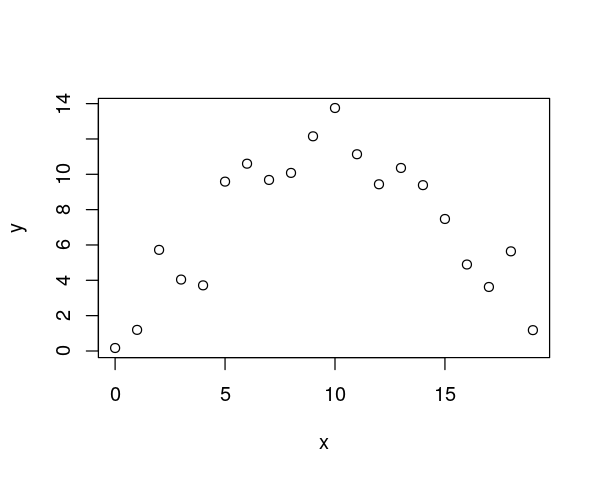

In [25]:
plot(x,y)

This model is obviously not linear in $x$. However, we can introduce a new variable $z\equiv x^2$, and make this a linear model with two variables as before.

In [26]:
z <- x^2
quadmodel <- lm(y~z+x, data=df)
quadmodel


Call:
lm(formula = y ~ z + x, data = df)

Coefficients:
(Intercept)            z            x  
    -0.4860      -0.1202       2.3705  


The estimated model is $\hat{y} = -0.1202x^2 + 2.3705x-0.4860$, while the truth was $y=-0.1x^2 + 2x -1 $.

We cannot plot the fitted curve directly with `abline()`. Instead, we need to extract the model coefficients and set up a predictions vector with it.

In [27]:
quadmodel$coefficients

(Intercept)           z           x 
 -0.4859914  -0.1201814   2.3704527

In [28]:
a <- quadmodel$coefficients["z"]
b <- quadmodel$coefficients["x"]
c <- quadmodel$coefficients["(Intercept)"]

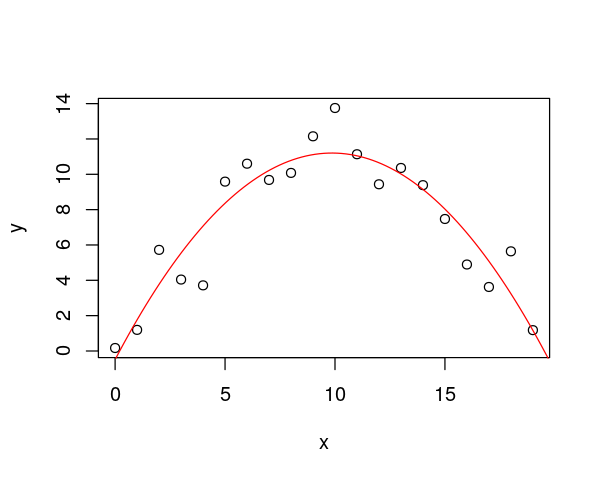

In [29]:
xp <- seq(0,20,length.out = 100)
yp <- a*xp^2 + b*xp + c
plot(x,y)
lines(xp,yp, col="red")